In [72]:
import os
from scipy.io import wavfile
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt

In [4]:
def get_data_dict(datafolder='../../data/archive/recordings_train'):
    file_names = os.listdir(datafolder)

    data_dict = {}
    for file in file_names:
        key = file.split('.')[0]
        mat = wavfile.read(datafolder + '/{}'.format(file))[1].astype(np.float32)
        data_dict[key] = mat
    return data_dict

In [6]:
dd = get_data_dict()

18262


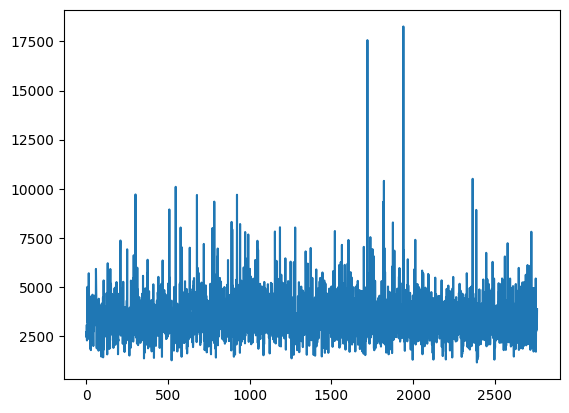

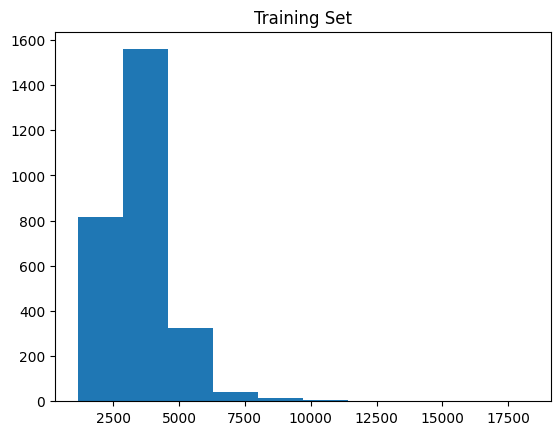

In [20]:
file_names = os.listdir('../../data/archive/recordings_train')
max = 0
lengths = []
for file in file_names:
    mat_len = len(wavfile.read('../../data/archive/recordings_train' + '/{}'.format(file))[1].astype(np.float32))
    lengths.append(mat_len)
    if mat_len > max:
        max = mat_len
        
print(max)
plt.plot(lengths)
plt.show()
plt.hist(lengths)
plt.title("Training Set")
plt.show()

9178


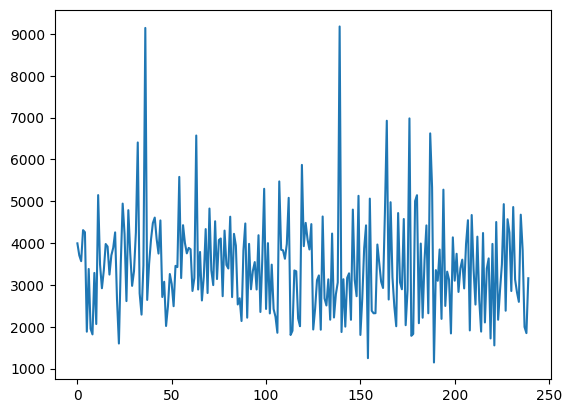

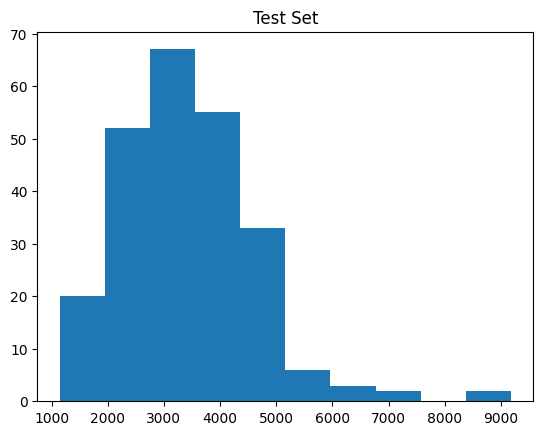

In [21]:
file_names = os.listdir('../../data/archive/recordings_test')
max = 0
lengths = []

for file in file_names:
    mat_len = len(wavfile.read('../../data/archive/recordings_test' + '/{}'.format(file))[1].astype(np.float32))
    lengths.append(mat_len)
    if mat_len > max:
        max = mat_len
        
print(max)
plt.plot(lengths)
plt.show()
plt.hist(lengths)
plt.title("Test Set")
plt.show()

In [2]:
Audio(wavfile.read('../../data/archive/recordings_test' + '/0_jackson_0.wav')[1].astype(np.float32), rate=8000)

In [3]:
jackson = wavfile.read('../../data/archive/recordings_test' + '/0_jackson_0.wav')[1].astype(np.float32)
print(len(jackson))
if len(jackson) < 8000:
    jackson_padded = np.append(jackson, np.array([0.0 for i in range(8000 - len(jackson))]))
else:
    jackson_padded = jackson[0:8000]
print(jackson_padded.shape)
Audio(jackson_padded, rate=8000)

5148
(8000,)


In [ ]:
def get_data_dict(data):
    data_dict = {}
    for line in data:
        print(line)
        if "[" in line:
            key = line.split()[0]
            mat = []
        elif "]" in line:
            line = line.split(']')[0]
            mat.append([float(x) for x in line.split()])
            data_dict[key]=np.array(mat)
        else:
            mat.append([float(x) for x in line.split()])
    return data_dict

with open('./train_1digit.feat') as f:
    test_data = get_data_dict(f.readlines())
my_dict = get_data_dict(test_data)
print(my_dict)

In [11]:
import librosa

librosa_mfcc_feature = librosa.feature.mfcc(y=jackson_padded[:-1].astype(np.float32), sr=8000, n_mfcc=39, n_fft=1024, win_length=int(0.025*8000), hop_length=int(0.01*8000))
print(librosa_mfcc_feature.shape)

(39, 100)


203/240
0.8458333333333333


Text(50.722222222222214, 0.5, 'Predicted')

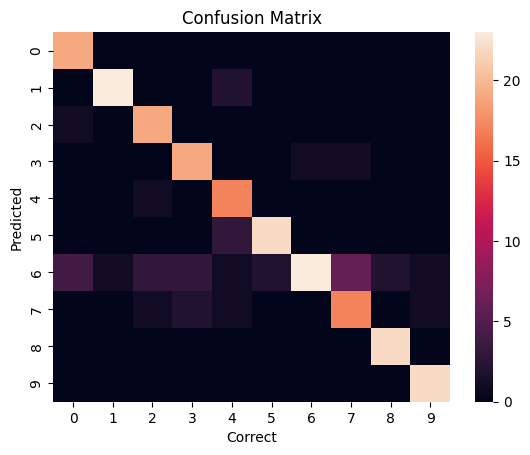

In [82]:
confusion_matrix = [[0 for i in range(10)] for j in range(10)]
with open('./temp.txt') as f:
    correct = []
    incorrect = []
    lines = f.readlines()
    cnt = 0
    for line in lines:
        if line.split()[7].split('_')[0] == line.split()[4]:
            correct.append(["({},{})".format(line.split()[4], line.split()[7].split('_')[0])]) # pred, act
            cnt += 1
        else:
            incorrect.append(["({},{})".format(line.split()[4], line.split()[7].split('_')[0])]) # pred, act
        
        confusion_matrix[int(line.split()[4])][int(line.split()[7].split('_')[0])] += 1
print("{}/{}".format(cnt, len(lines)))
print(cnt/len(lines))

#print(correct)
#print()
#print(incorrect)
import seaborn as sn


sn.heatmap(confusion_matrix)
plt.title("Spoken Digit Confusion Matrix")
plt.xlabel('Correct')
plt.ylabel('Predicted')

Correct:  Counter({'(1,1)': 23, '(6,6)': 23, '(5,5)': 22, '(8,8)': 22, '(9,9)': 22, '(0,0)': 19, '(3,3)': 19, '(2,2)': 19, '(4,4)': 17, '(7,7)': 17})
['(4,4)', '(0,0)', '(3,3)', '(2,2)', '(7,7)', '(1,1)', '(5,5)', '(8,8)', '(9,9)', '(6,6)']
[17, 19, 19, 19, 17, 23, 22, 22, 22, 23]


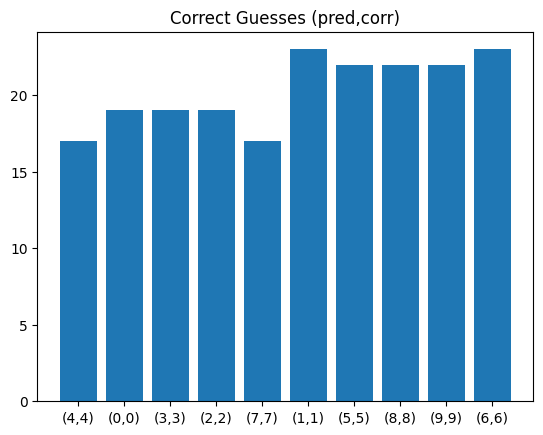

Incorrect:  Counter({'(6,7)': 6, '(6,0)': 4, '(6,3)': 3, '(5,4)': 3, '(6,2)': 3, '(7,3)': 2, '(6,8)': 2, '(6,5)': 2, '(1,4)': 2, '(7,4)': 1, '(6,4)': 1, '(7,2)': 1, '(4,2)': 1, '(2,0)': 1, '(3,7)': 1, '(7,9)': 1, '(6,9)': 1, '(3,6)': 1, '(6,1)': 1})


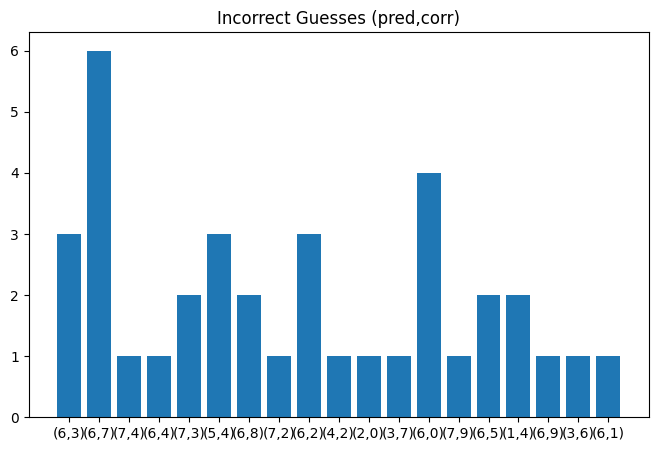

In [74]:
from collections import Counter
from itertools import chain
 
# Using counter and chain
out_corr = Counter(chain(*correct))
out_inc = Counter(chain(*incorrect))

print("Correct: ", out_corr)
print(list(out_corr.keys()))
print(list(out_corr.values()))
plt.bar(list(out_corr.keys()), list(out_corr.values()))
plt.title("Correct Guesses (pred,corr)")
plt.show()

print("Incorrect: ", out_inc)
fig = plt.figure(figsize=(8, 5))
plt.bar(out_inc.keys(), out_inc.values())
plt.title("Incorrect Guesses (pred,corr)")
plt.show()